In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes


In [5]:
raw_data=load_diabetes()

In [6]:
data=pd.DataFrame(raw_data.data,columns=raw_data.feature_names)

In [7]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [11]:
X=raw_data.data

In [12]:
y=raw_data.target

In [13]:
feature_names=raw_data.feature_names

In [14]:
data=pd.DataFrame(X,columns=feature_names)

In [15]:
data['Progression']=y

In [20]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [22]:
data.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [24]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


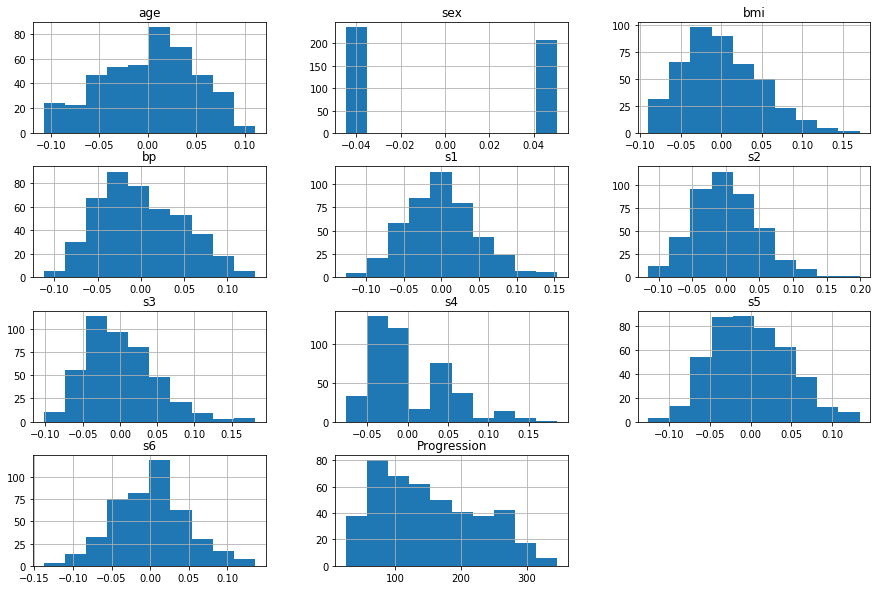

In [34]:
data.hist(bins=10, figsize=(15, 10))
plt.show()

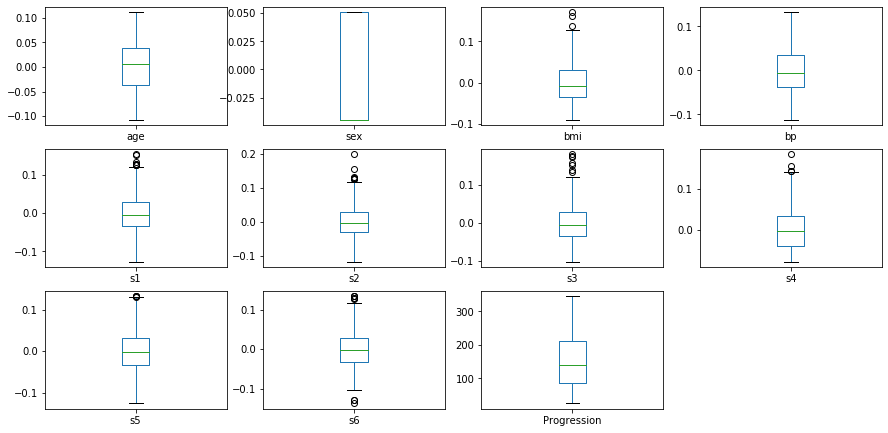

In [35]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()

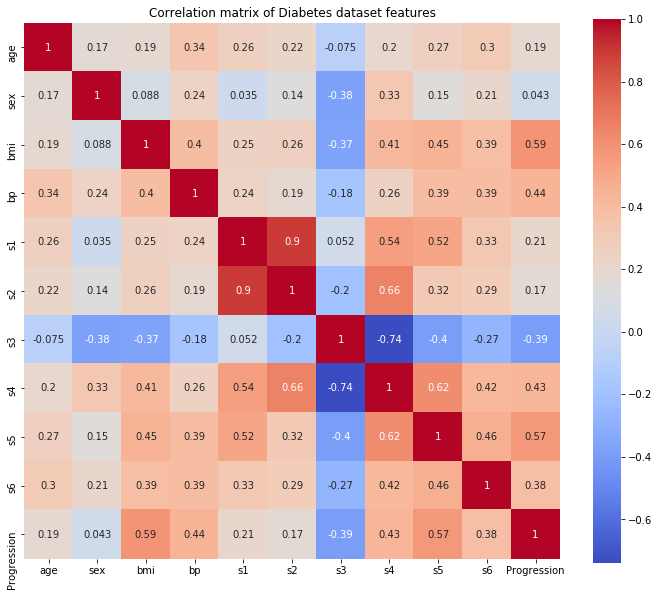

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm')
plt.title("Correlation matrix of Diabetes dataset features")
plt.show()

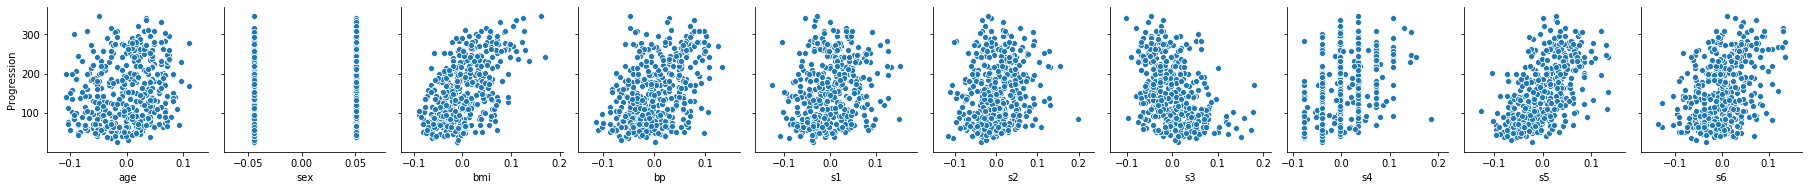

In [38]:
sns.pairplot(data, y_vars='Progression', x_vars=data.columns[:-1])
plt.show()